In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import scipy.integrate as integrate

In [2]:
def Prior(p):
    return np.piecewise( p, [p>= 0 and p <= 4, p<0 and p > 4], [lambda p: 1, lambda p:0])

In [3]:
Prior = np.vectorize(Prior)

In [4]:
def Likelihood(p,mu,sigma):
    return 1/(sigma*np.sqrt(2*np.pi))*np.e**(-1/2*((p-mu)/sigma)**2)

In [5]:
def Posterior(p,r,n):
    return Likelihood(p,r,n)*Prior(p)

In [6]:
p = np.linspace(0,4,100)
mu = 2
sigma = 0.5
Pos = Posterior(p,mu,sigma)

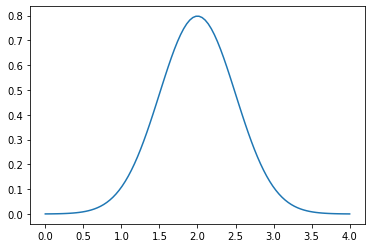

In [7]:
plt.plot(p,Pos)

In [8]:
I,_ = integrate.quad(Posterior,p[0],p[-1],args=(mu,sigma))
I

0.9999366575163339

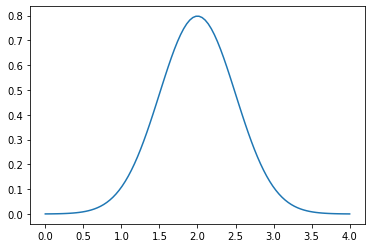

In [9]:
plt.plot(p, Pos/I)

In [10]:
def Metropolis(x0, Posterior, NSteps=int(1e4), delta= 0.4):
    
    x = np.zeros((NSteps,1))
    
    x[0] = x0
    
    for i in tqdm(range(1,NSteps)):
        
        P0 = Posterior(x[i-1],mu,sigma)
        
        xf = x[i-1] + delta*2*(np.random.rand()-0.5)
        
        P1 = Posterior(xf,mu,sigma)
        
        alpha = np.minimum( 1, P1/P0 )
        g = np.random.rand()
        
        if alpha > g:
            x[i,0] = xf
        else:
            x[i,:] = x[i-1,:]
            
    return x[1000:,:]

In [11]:
initparams = np.array([2])
MCMC = Metropolis(initparams,Posterior)

100%|████████████████████████████| 9999/9999 [00:01<00:00, 7861.49it/s]


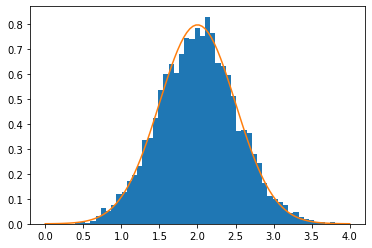

In [12]:
plt.hist(MCMC,density=True,bins=50)
plt.plot(p,Pos/I)